# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path=r'C:\Users\alexl\CareerFoundry\World Happiness Report 2015-2019'

In [4]:
#Import data
df_clean=pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'df_clean.csv'), index_col=False)

# 2. Data cleaning

In [7]:
df_clean.columns

Index(['Unnamed: 0', 'Year', 'Overall rank', 'Country or region', 'Score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [5]:
df_clean.head(20)

,Unnamed: 0,Year,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0,2019,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,1,2019,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2,2019,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,3,2019,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,4,2019,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,5,2019,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,6,2019,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,7,2019,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,8,2019,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,9,2019,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [8]:
df_clean.shape

(781, 11)

In [10]:
#Rename columns
df_clean.rename(columns={'Overall rank': 'Ranking', 'Country or region':'Country', 'GDP per capita': 'GDP', 'Social support': 'Social Support', 'Healthy life expectancy': 'Life Expectancy', 'Freedom to make life choices': 'Freedom', 'Perceptions of corruption': 'Corruption'}, inplace=True)

In [11]:
#Check for missing values
df_clean.isnull().sum()
#no missing values

Unnamed: 0         0
Year               0
Ranking            0
Country            0
Score              0
GDP                0
Social Support     0
Life Expectancy    0
Freedom            0
Generosity         0
Corruption         0
dtype: int64

In [12]:
#check for duplicates
dups=df_clean.duplicated()

In [13]:
dups.shape
#no duplicates

(781,)

C:\Users\alexl\AppData\Local\Temp\ipykernel_5828\3014563212.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['Life Expectancy'], bins=25)


<Axes: xlabel='Life Expectancy', ylabel='Density'>

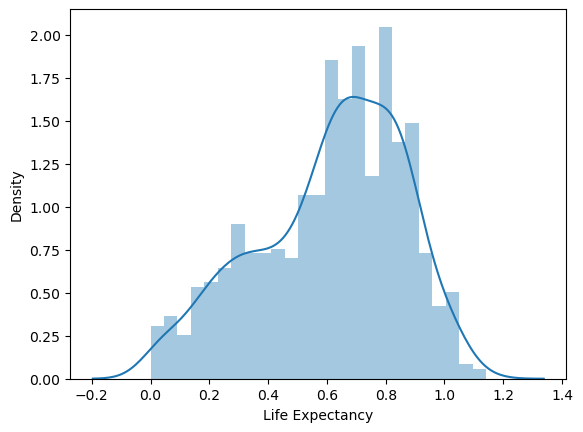

In [15]:
sns.distplot(df_clean['Life Expectancy'], bins=25) 

In [17]:
df_clean['Life Expectancy'].mean() #Check the mean

0.6123418454699104

In [18]:
df_clean['Life Expectancy'].median() #Check the median

0.647239029

In [19]:
df_clean['Life Expectancy'].max() #Check the max

1.141

In [37]:
df_clean['Generosity'].max() #Check the max GENEROSITY

0.838075161

In [20]:
df_clean['Life Expectancy'].min() #Check the min

0.0

# 3. Regression analysis

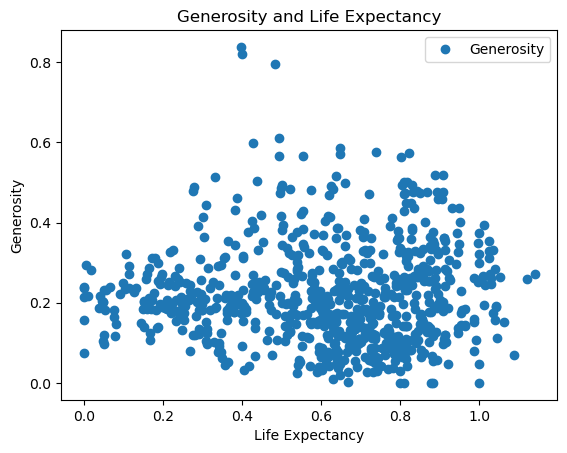

In [22]:
#Scatterplot using matplotlib for another look at how the variables plot against each other
df_clean.plot(x='Life Expectancy', y='Generosity', style='o')
plt.title('Generosity and Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Generosity')
plt.show()

In [23]:
#Reshape the variables into NumPy arrays and put them into separate objects
X=df_clean['Life Expectancy'].values.reshape(-1,1)
y=df_clean['Generosity'].values.reshape(-1,1)

In [24]:
X

array([[0.986     ],
       [0.996     ],
       [1.028     ],
       [1.026     ],
       [0.999     ],
       [1.052     ],
       [1.009     ],
       [1.026     ],
       [1.039     ],
       [1.016     ],
       [1.036     ],
       [0.963     ],
       [1.029     ],
       [1.012     ],
       [0.996     ],
       [0.999     ],
       [0.987     ],
       [0.986     ],
       [0.874     ],
       [0.92      ],
       [0.825     ],
       [0.999     ],
       [0.861     ],
       [1.045     ],
       [0.914     ],
       [0.92      ],
       [0.746     ],
       [0.795     ],
       [0.871     ],
       [1.062     ],
       [0.91      ],
       [0.802     ],
       [0.891     ],
       [1.141     ],
       [0.789     ],
       [1.039     ],
       [0.871     ],
       [0.881     ],
       [0.713     ],
       [0.884     ],
       [0.756     ],
       [0.818     ],
       [0.841     ],
       [0.953     ],
       [0.835     ],
       [0.758     ],
       [0.881     ],
       [0.825

In [25]:
y

array([[0.153     ],
       [0.252     ],
       [0.271     ],
       [0.354     ],
       [0.322     ],
       [0.263     ],
       [0.267     ],
       [0.33      ],
       [0.285     ],
       [0.244     ],
       [0.332     ],
       [0.144     ],
       [0.261     ],
       [0.194     ],
       [0.348     ],
       [0.298     ],
       [0.261     ],
       [0.16      ],
       [0.28      ],
       [0.046     ],
       [0.262     ],
       [0.375     ],
       [0.074     ],
       [0.111     ],
       [0.242     ],
       [0.187     ],
       [0.175     ],
       [0.08      ],
       [0.22      ],
       [0.153     ],
       [0.109     ],
       [0.099     ],
       [0.127     ],
       [0.271     ],
       [0.093     ],
       [0.158     ],
       [0.255     ],
       [0.121     ],
       [0.185     ],
       [0.117     ],
       [0.322     ],
       [0.043     ],
       [0.099     ],
       [0.144     ],
       [0.2       ],
       [0.262     ],
       [0.066     ],
       [0.083

In [26]:
#Split data into a training set and a test set
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=0)

In [27]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [28]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

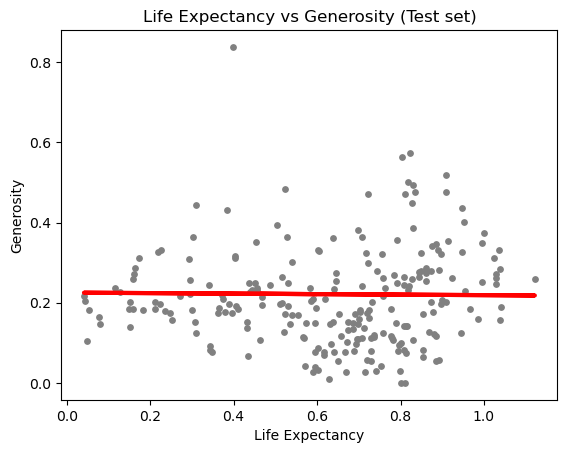

In [31]:
#Create a plot that shows the regression line from the model on the test set
plot_test=plt
plot_test.scatter(X_test, y_test, color='gray', s=15)
plot_test.plot(X_test, y_predicted, color='red', linewidth=3)
plot_test.title('Life Expectancy vs Generosity (Test set)')
plot_test.xlabel('Life Expectancy')
plot_test.ylabel('Generosity')
plot_test.show()

Hypothesis: The greater the generosity, the longer the life expectancy

In [32]:
#Create objects for model mean squared error and R2 score
rmse=mean_squared_error(y_test, y_predicted)
r2=r2_score(y_test, y_predicted)

In [33]:
#Print the model summary statistics
print('Slope:',regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00632066]]
Mean squared error:  0.014542494016546486
R2 score:  -0.008045076268899942


the MSE isn't so large, but the R2 is rather small indicating a poor fit

In [34]:
#Create a dataframe comparing the actual and predicted values of y
data=pd.DataFrame({'Actual':y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.193513,0.222324
1,0.327060,0.219295
2,0.172668,0.221154
3,0.348000,0.218986
4,0.151000,0.222545
5,0.444860,0.223322
6,0.055470,0.220672
7,0.183000,0.224131
8,0.064000,0.219884
9,0.055000,0.219694


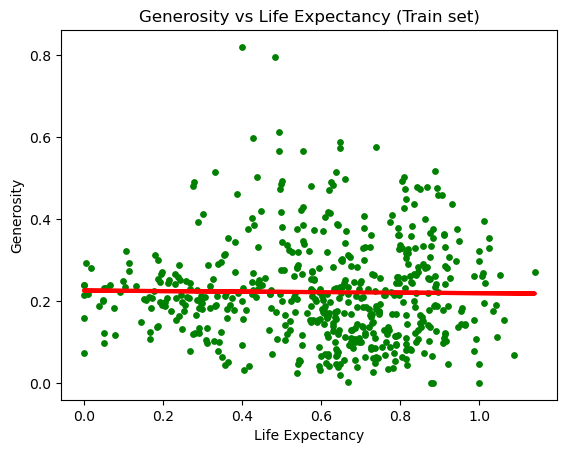

In [36]:
#Visualizing the training set results

plot_test=plt
plot_test.scatter(X_train, y_train, color='green', s=15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth=3)
plot_test.title('Generosity vs Life Expectancy (Train set)')
plot_test.xlabel('Life Expectancy')
plot_test.ylabel('Generosity')
plot_test.show()

Bonus: performance improvement after removing outliers

In [40]:
#Clean the extreme values from the "Price per Unit" variable observed during consistency checks
df_test=df_clean[df_clean['Generosity']<=.7]

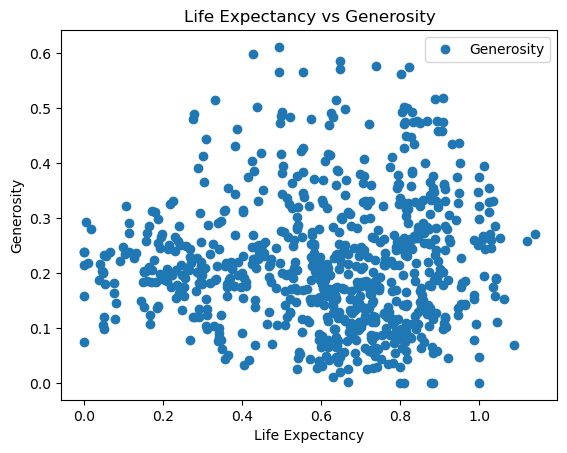

In [41]:
#See how the scatterplot looks without outliers
df_test.plot(x='Life Expectancy', y='Generosity', style='o')
plt.title('Life Expectancy vs Generosity')
plt.xlabel('Life Expectancy')
plt.ylabel('Generosity')
plt.show()

In [42]:
#Reshape again
X_2=df_test['Life Expectancy'].values.reshape(-1,1)
y_2=df_test['Generosity'].values.reshape(-1,1)

In [43]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [44]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [45]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [46]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [47]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01835504]]
Mean squared error:  0.01229787836331263
R2 score:  -0.013305472947004793


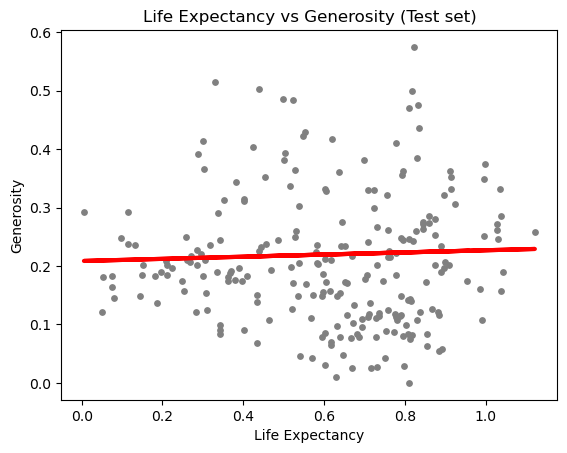

In [48]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Life Expectancy vs Generosity (Test set)')
plot_test.xlabel('Life Expectancy')
plot_test.ylabel('Generosity')
plot_test.show()

In [49]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,0.151000,0.216499
1,0.330474,0.221585
2,0.148000,0.218389
3,0.348000,0.226833
4,0.246000,0.227457
5,0.099348,0.214824
6,0.216840,0.220817
7,0.217470,0.213530
8,0.189143,0.212163
9,0.169000,0.218738
